In [1]:

# prompt: kaggle datasets download -d ohagwucollinspatrick/ghana-crop-disease

!kaggle datasets download -d ohagwucollinspatrick/ghana-crop-disease

Dataset URL: https://www.kaggle.com/datasets/ohagwucollinspatrick/ghana-crop-disease
License(s): Attribution 4.0 International (CC BY 4.0)
100% 10.4G/10.4G [01:02<00:00, 214MB/s]
100% 10.4G/10.4G [01:02<00:00, 177MB/s]


In [2]:
!unzip ghana-crop-disease.zip -d data


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: data/images/id_axf8fk.jpg  
  inflating: data/images/id_axfwao.jpg  
  inflating: data/images/id_axjera.jpg  
  inflating: data/images/id_axktj2.jpg  
  inflating: data/images/id_axojpi.jpg  
  inflating: data/images/id_ay7lil.jpg  
  inflating: data/images/id_ay85js.jpg  
  inflating: data/images/id_ayd2my.jpg  
  inflating: data/images/id_ayeiia.jpg  
  inflating: data/images/id_ayklsb.jpg  
  inflating: data/images/id_azbboc.jpg  
  inflating: data/images/id_azkhqh.jpg  
  inflating: data/images/id_azriv5.jpg  
  inflating: data/images/id_azzp7g.jpg  
  inflating: data/images/id_b11ovu.jpg  
  inflating: data/images/id_b15b2l.jpg  
  inflating: data/images/id_b1awql.jpg  
  inflating: data/images/id_b1e9sg.jpg  
  inflating: data/images/id_b1mlcd.jpg  
  inflating: data/images/id_b1sv9d.jpg  
  inflating: data/images/id_b2do8m.jpg  
  inflating: data/images/id_b2e92m.jpg  
  inflating: data/im

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load train and test files
train = pd.read_csv('/content/data/Train.csv')
test = pd.read_csv('/content/data/Test.csv')


# Afficher les premières lignes du fichier d'entraînement
print("Train Data:")
print(train.head())

# Afficher les premières lignes du fichier de test
print("\nTest Data:")
print(test.head())

# Afficher les informations sur les colonnes
print("\nTrain Data Info:")
print(train.info())

Train Data:
        Image_ID  confidence                  class         ymin        xmin  \
0  id_11543h.jpg         1.0  Pepper_Bacterial_Spot   194.649671  328.803454   
1  id_11543h.jpg         1.0  Pepper_Bacterial_Spot   149.632401  256.768914   
2  id_11543h.jpg         1.0  Pepper_Bacterial_Spot   234.046875  327.138158   
3  id_11543h.jpg         1.0  Pepper_Bacterial_Spot   221.277138  340.411184   
4  id_11ee1c.jpg         1.0        Pepper_Fusarium  2000.563598  989.588908   

          ymax         xmax  
0   208.107730   341.967928  
1   162.910362   266.195724  
2   252.712993   338.876645  
3   238.593750   354.651316  
4  2184.252196  1401.748952  

Test Data:
        Image_ID  confidence  class  ymin  xmin  ymax  xmax
0  id_128pxx.jpg         NaN    NaN   NaN   NaN   NaN   NaN
1  id_12jbci.jpg         NaN    NaN   NaN   NaN   NaN   NaN
2  id_143s4o.jpg         NaN    NaN   NaN   NaN   NaN   NaN
3  id_14tfmb.jpg         NaN    NaN   NaN   NaN   NaN   NaN
4  id_14tw4o.jp

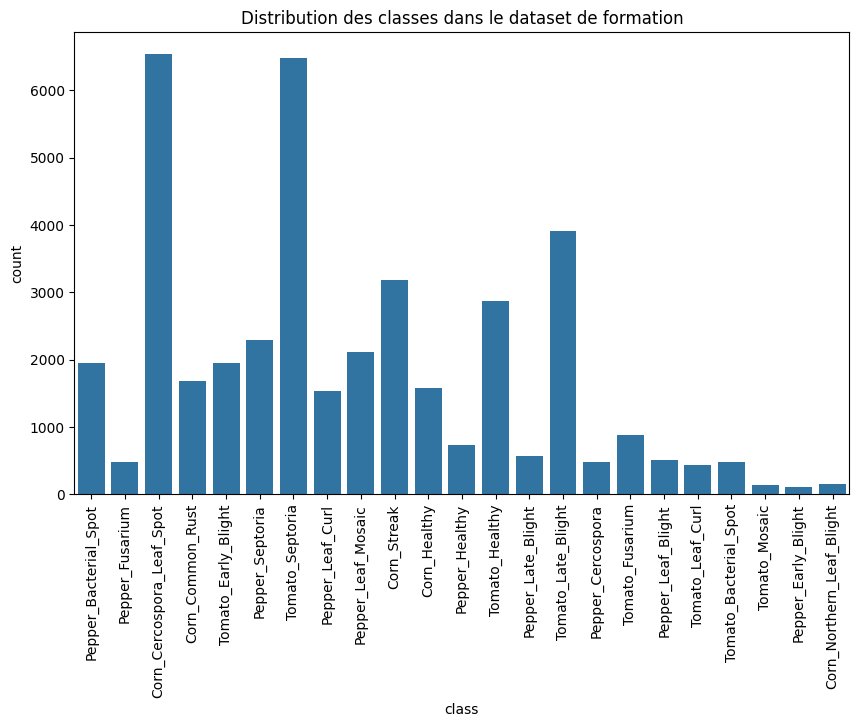

In [4]:

# Charger les données
#train = pd.read_csv('/content/Train.csv')

# Visualiser la distribution des classes
plt.figure(figsize=(10,6))
sns.countplot(x='class', data=train)
plt.title('Distribution des classes dans le dataset de formation')
plt.xticks(rotation=90)
plt.show()

# Analyser les dimensions des images (si disponibles)
train['image_path'] = '/content/images/' + train['Image_ID']

In [5]:
# Calculer la fréquence des classes
class_counts = train['class'].value_counts()
total_count = len(train)

# Calculer les poids en inversant la fréquence de chaque classe
class_weights = {cls: total_count / count for cls, count in class_counts.items()}

# Afficher les poids attribués à chaque classe
print("Class Weights:", class_weights)


Class Weights: {'Corn_Cercospora_Leaf_Spot': 6.275466503517896, 'Tomato_Septoria': 6.328705846058924, 'Tomato_Late_Blight': 10.471924451250638, 'Corn_Streak': 12.902201257861636, 'Tomato_Healthy': 14.285863509749303, 'Pepper_Septoria': 17.877559912854032, 'Pepper_Leaf_Mosaic': 19.417415996213915, 'Tomato_Early_Blight': 21.08376156217883, 'Pepper_Bacterial_Spot': 21.116314976839938, 'Corn_Common_Rust': 24.392984542211654, 'Corn_Healthy': 26.116486314449396, 'Pepper_Leaf_Curl': 26.816339869281045, 'Tomato_Fusarium': 46.518140589569164, 'Pepper_Healthy': 55.74592391304348, 'Pepper_Late_Blight': 71.35478260869566, 'Pepper_Leaf_Blight': 80.76574803149606, 'Tomato_Bacterial_Spot': 84.77066115702479, 'Pepper_Fusarium': 86.92584745762711, 'Pepper_Cercospora': 86.92584745762711, 'Tomato_Leaf_Curl': 93.88787185354691, 'Corn_Northern_Leaf_Blight': 261.3312101910828, 'Tomato_Mosaic': 306.1865671641791, 'Pepper_Early_Blight': 406.2277227722772}


In [6]:
import pandas as pd
df = pd.read_csv('/content/data/Train.csv')
unique_classes = df['class'].unique()
class_mapping = {cls: idx for idx, cls in enumerate(unique_classes)}
print(class_mapping)


{'Pepper_Bacterial_Spot': 0, 'Pepper_Fusarium': 1, 'Corn_Cercospora_Leaf_Spot': 2, 'Corn_Common_Rust': 3, 'Tomato_Early_Blight': 4, 'Pepper_Septoria': 5, 'Tomato_Septoria': 6, 'Pepper_Leaf_Curl': 7, 'Pepper_Leaf_Mosaic': 8, 'Corn_Streak': 9, 'Corn_Healthy': 10, 'Pepper_Healthy': 11, 'Tomato_Healthy': 12, 'Pepper_Late_Blight': 13, 'Tomato_Late_Blight': 14, 'Pepper_Cercospora': 15, 'Tomato_Fusarium': 16, 'Pepper_Leaf_Blight': 17, 'Tomato_Leaf_Curl': 18, 'Tomato_Bacterial_Spot': 19, 'Tomato_Mosaic': 20, 'Pepper_Early_Blight': 21, 'Corn_Northern_Leaf_Blight': 22}


In [7]:
# Import libraries
!pip install ultralytics
import pandas as pd
import os
from pathlib import Path
import shutil
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import cv2
import yaml
import matplotlib.pyplot as plt
from ultralytics import YOLO
import multiprocessing



# Set the data directory
DATA_DIR = Path('/content/data')

# Load train and test files
train = pd.read_csv(DATA_DIR / 'Train.csv')
test = pd.read_csv(DATA_DIR / 'Test.csv')
ss = pd.read_csv(DATA_DIR / 'SampleSubmission.csv')

# Add an image_path column
train['image_path'] = [Path('/content/data/images/' + x) for x in train.Image_ID]
test['image_path'] = [Path('/content/data/images/' + x) for x in test.Image_ID]

# Map string classes to integers (label encoding targets)
train['class_id'] = train['class'].map(
    {'Pepper_Bacterial_Spot': 0, 'Pepper_Fusarium': 1, 'Corn_Cercospora_Leaf_Spot': 2, 'Corn_Common_Rust': 3, 'Tomato_Early_Blight': 4, 'Pepper_Septoria': 5, 'Tomato_Septoria': 6, 'Pepper_Leaf_Curl': 7, 'Pepper_Leaf_Mosaic': 8, 'Corn_Streak': 9, 'Corn_Healthy': 10, 'Pepper_Healthy': 11, 'Tomato_Healthy': 12, 'Pepper_Late_Blight': 13, 'Tomato_Late_Blight': 14, 'Pepper_Cercospora': 15, 'Tomato_Fusarium': 16, 'Pepper_Leaf_Blight': 17, 'Tomato_Leaf_Curl': 18, 'Tomato_Bacterial_Spot': 19, 'Tomato_Mosaic': 20, 'Pepper_Early_Blight': 21, 'Corn_Northern_Leaf_Blight': 22})

# Split data into training and validation
train_unique_imgs_df = train.drop_duplicates(subset=['Image_ID'], ignore_index=True)
X_train, X_val = train_test_split(train_unique_imgs_df, test_size=0.25, stratify=train_unique_imgs_df['class'], random_state=42)

X_train = train[train.Image_ID.isin(X_train.Image_ID)]
X_val = train[train.Image_ID.isin(X_val.Image_ID)]

# Check the shapes of training and validation data
print(X_train.shape, X_val.shape)

# Define directories for images and labels
TRAIN_IMAGES_DIR = Path('/content/data1/train/images')
VAL_IMAGES_DIR = Path('/content/data1/val/images')
TEST_IMAGES_DIR = Path('/content/data1/test/images')
TRAIN_LABELS_DIR = Path('/content/data1/train/labels')
VAL_LABELS_DIR = Path('/content/data1/val/labels')
TEST_LABELS_DIR = Path('/content/data1/test/labels')

# Create necessary directories
for DIR in [TRAIN_IMAGES_DIR, VAL_IMAGES_DIR, TEST_IMAGES_DIR, TRAIN_LABELS_DIR, VAL_LABELS_DIR, TEST_LABELS_DIR]:
    if DIR.exists():
        shutil.rmtree(DIR)
    DIR.mkdir(parents=True, exist_ok=True)

# Copy train, val, and test images to their respective dirs
for img in tqdm(X_train.image_path.unique()):
    shutil.copy(img, TRAIN_IMAGES_DIR / img.parts[-1])

for img in tqdm(X_val.image_path.unique()):
    shutil.copy(img, VAL_IMAGES_DIR / img.parts[-1])

for img in tqdm(test.image_path.unique()):
    shutil.copy(img, TEST_IMAGES_DIR / img.parts[-1])

# Function to convert the bounding boxes to YOLO format and save them
def save_yolo_annotation(row):
    image_path, class_id, output_dir = row['image_path'], row['class_id'], row['output_dir']

    img = cv2.imread(str(image_path))
    if img is None:
        raise ValueError(f"Could not read image from path: {image_path}")

    height, width, _ = img.shape
    label_file = Path(output_dir) / f"{Path(image_path).stem}.txt"

    ymin, xmin, ymax, xmax = row['ymin'], row['xmin'], row['ymax'], row['xmax']

    # Normalize the coordinates
    x_center = (xmin + xmax) / 2 / width
    y_center = (ymin + ymax) / 2 / height
    bbox_width = (xmax - xmin) / width
    bbox_height = (ymax - ymin) / height

    with open(label_file, 'a') as f:
        f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}\n")

# Parallelize the annotation saving process
def process_dataset(dataframe, output_dir):
    dataframe['output_dir'] = output_dir
    with multiprocessing.Pool() as pool:
        list(tqdm(pool.imap(save_yolo_annotation, dataframe.to_dict('records')), total=len(dataframe)))

# Save train and validation labels to their respective dirs
process_dataset(X_train, TRAIN_LABELS_DIR)
process_dataset(X_val, VAL_LABELS_DIR)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 17.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
(30777, 9) (10252, 9)


  0%|          | 0/3676 [00:00<?, ?it/s]

  0%|          | 0/1226 [00:00<?, ?it/s]

  0%|          | 0/2101 [00:00<?, ?it/s]

<ipython-input-7-d663e55685dd>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['output_dir'] = output_dir


  0%|          | 0/30777 [00:00<?, ?it/s]

<ipython-input-7-d663e55685dd>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['output_dir'] = output_dir


  0%|          | 0/10252 [00:00<?, ?it/s]

In [8]:
import yaml
from pathlib import Path


# Obtenir les classes uniques de votre jeu de données
# Remplacer 'train' par votre dataframe contenant la colonne 'class'
class_names = train['class'].unique().tolist()  # Exemple si vous avez un dataframe `train` avec une colonne `class`
num_classes = len(class_names)

# Poids des classes : donnez plus de poids aux classes rares, par exemple
cls_weights = [1.0, 5.0, 10.0]  # Adaptez selon le nombre de classes et leur rareté

# Créer le fichier data.yaml
data_yaml = {
    'train': str(TRAIN_IMAGES_DIR),
    'val': str(VAL_IMAGES_DIR),
    'nc': num_classes,
    'names': class_names,
    'cls_weights': cls_weights  # Ajouter la pondération des classes
}

# Sauvegarder le fichier data.yaml
yaml_path = Path('data.yaml')
with open(yaml_path, 'w') as file:
    yaml.dump(data_yaml, file, default_flow_style=False)

print("data.yaml créé avec succès !")


data.yaml créé avec succès !


In [9]:
import yaml

# Définitions pour le fichier data.yaml
data_yaml = {
    'cls_weights': [
        0.015, 0.214, 0.015, 0.059, 0.084, 0.105, 0.114, 0.105, 0.128, 0.214,
        0.229, 0.229, 0.125, 0.203, 0.256, 0.273, 0.643, 0.276, 0.184, 0.316,
        1.0, 0.128, 0.873
    ],
    'names': [
        'Pepper_Bacterial_Spot', 'Pepper_Fusarium', 'Corn_Cercospora_Leaf_Spot', 'Corn_Common_Rust', 'Tomato_Early_Blight',
        'Pepper_Septoria', 'Tomato_Septoria', 'Pepper_Leaf_Curl', 'Pepper_Leaf_Mosaic', 'Corn_Streak', 'Corn_Healthy',
        'Pepper_Healthy', 'Tomato_Healthy', 'Pepper_Late_Blight', 'Tomato_Late_Blight', 'Pepper_Cercospora',
        'Tomato_Fusarium', 'Pepper_Leaf_Blight', 'Tomato_Leaf_Curl', 'Tomato_Bacterial_Spot', 'Tomato_Mosaic',
        'Pepper_Early_Blight', 'Corn_Northern_Leaf_Blight'
    ],
    'nc': 23,
    'train': '/content/data1/train/images',
    'val': '/content/data1/val/images'
}

# Chemin vers le fichier data.yaml
yaml_path = '/content/data.yaml'

# Écriture dans le fichier data.yaml
with open(yaml_path, 'w') as file:
    yaml.dump(data_yaml, file, default_flow_style=False)

print(f"Fichier {yaml_path} modifié avec succès.")


Fichier /content/data.yaml modifié avec succès.


In [10]:
 from ultralytics import YOLO

# Charger le modèle YOLOv8 pré-entraîné
model = YOLO('yolov8s.pt')

# Configurations avancées
training_params = {
    'data': 'data.yaml',           # Chemin vers le fichier de configuration des données
    'epochs': 50,                 # Augmenter les epochs pour un meilleur ajustement (ajustez selon votre temps)
    'batch': 8,                   # Utiliser un batch plus grand si le GPU le permet
    'imgsz': 1280,                  # Taille des images
    'device': 0,                   # Utilisation du GPU 0
    'optimizer': 'AdamW',          # Optimiseur moderne pour un meilleur ajustement
    'lr0': 1e-3,                   # Taux d'apprentissage initial
    'lrf': 0.01,                   # Facteur de réduction du taux d'apprentissage
    'momentum': 0.937,             # Momentum pour la convergence rapide
    'weight_decay': 0.0005,        # Décroissance du poids pour éviter le sur-ajustement
    'seed': 42,                    # Reproductibilité
    'patience': 10,                # Arrêt anticipé si aucune amélioration
    'augment': True,               # Augmenter les données par défaut
    'verbose': True,               # Affichage des logs détaillés
}

# Entraîner le modèle
model.train(**training_params)

# Sauvegarder les résultats
print("Entraînement terminé. Les résultats sont sauvegardés dans le dossier 'runs/train'.")

100%|██████████| 21.5M/21.5M [00:00<00:00, 177MB/s]


Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=50, time=None, patience=10, batch=8, imgsz=1280, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]


Overriding model.yaml nc=80 with nc=23

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 66.3MB/s]


AMP: checks passed ✅


train: Scanning /content/data1/train/labels... 3676 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3676/3676 [00:03<00:00, 1133.28it/s]


train: New cache created: /content/data1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/data1/val/labels... 1226 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1226/1226 [00:01<00:00, 966.29it/s]

val: New cache created: /content/data1/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.25G      2.296      3.541      1.935         44       1280: 100%|██████████| 460/460 [01:20<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:17<00:00,  4.36it/s]


                   all       1226      10252      0.152      0.186     0.0572     0.0216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.29G        2.2      2.921      1.847        104       1280: 100%|██████████| 460/460 [01:17<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.89it/s]


                   all       1226      10252      0.466      0.173     0.0847     0.0338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.13G      2.189      2.809      1.824         51       1280: 100%|██████████| 460/460 [01:18<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.84it/s]


                   all       1226      10252      0.381      0.158     0.0859     0.0342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.97G      2.137      2.705      1.802         43       1280: 100%|██████████| 460/460 [01:18<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.98it/s]


                   all       1226      10252      0.307      0.175      0.106     0.0427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.51G      2.134      2.615      1.773         26       1280: 100%|██████████| 460/460 [01:17<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.82it/s]


                   all       1226      10252      0.466      0.184      0.127      0.052

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.41G       2.12      2.584      1.772        128       1280: 100%|██████████| 460/460 [01:17<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:17<00:00,  4.49it/s]


                   all       1226      10252      0.332      0.234      0.139      0.056

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.56G      2.095      2.533      1.755         42       1280: 100%|██████████| 460/460 [01:18<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:16<00:00,  4.77it/s]


                   all       1226      10252      0.424      0.235      0.144     0.0591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.83G      2.076      2.492      1.741         32       1280: 100%|██████████| 460/460 [01:19<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.86it/s]


                   all       1226      10252      0.371      0.228      0.139     0.0592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.04G      2.053      2.407      1.706         73       1280: 100%|██████████| 460/460 [01:17<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.82it/s]


                   all       1226      10252      0.362      0.268      0.166     0.0705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.67G      2.042      2.388      1.691         79       1280: 100%|██████████| 460/460 [01:18<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:16<00:00,  4.71it/s]


                   all       1226      10252      0.328       0.23      0.167     0.0697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.02G      2.028       2.35      1.688         36       1280: 100%|██████████| 460/460 [01:18<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.91it/s]


                   all       1226      10252      0.445      0.274      0.201     0.0857

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.91G      2.021      2.318      1.683         39       1280: 100%|██████████| 460/460 [01:18<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:16<00:00,  4.78it/s]


                   all       1226      10252      0.399      0.279      0.202     0.0848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.99G      2.007      2.321      1.679         41       1280: 100%|██████████| 460/460 [01:18<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:16<00:00,  4.57it/s]


                   all       1226      10252      0.372      0.286      0.192     0.0821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.22G      2.002      2.278      1.656         41       1280: 100%|██████████| 460/460 [01:19<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.81it/s]


                   all       1226      10252      0.418      0.288      0.215     0.0925

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.82G      1.985      2.231      1.648        133       1280: 100%|██████████| 460/460 [01:17<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:16<00:00,  4.76it/s]


                   all       1226      10252      0.385      0.303      0.214      0.091

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.89G      1.987      2.224      1.649         47       1280: 100%|██████████| 460/460 [01:19<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  5.01it/s]


                   all       1226      10252      0.272      0.307      0.219     0.0924

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.66G      1.978      2.211      1.636         32       1280: 100%|██████████| 460/460 [01:18<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.88it/s]


                   all       1226      10252      0.352      0.284       0.21     0.0858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.64G      1.971      2.186      1.635         26       1280: 100%|██████████| 460/460 [01:17<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:16<00:00,  4.74it/s]


                   all       1226      10252      0.388      0.288       0.22     0.0946

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.11G      1.947      2.149      1.628         72       1280: 100%|██████████| 460/460 [01:18<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.93it/s]


                   all       1226      10252      0.368      0.303      0.233     0.0998

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.02G      1.955      2.124      1.619         37       1280: 100%|██████████| 460/460 [01:18<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:16<00:00,  4.80it/s]


                   all       1226      10252       0.38      0.318      0.251      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.07G      1.937      2.107      1.613        125       1280: 100%|██████████| 460/460 [01:18<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.93it/s]


                   all       1226      10252      0.407      0.311      0.246      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.14G      1.933      2.087      1.609        133       1280: 100%|██████████| 460/460 [01:18<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:16<00:00,  4.78it/s]


                   all       1226      10252      0.364      0.324      0.226     0.0972

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.76G      1.927      2.059      1.598         92       1280: 100%|██████████| 460/460 [01:18<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  5.06it/s]


                   all       1226      10252       0.43      0.324      0.261      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.49G      1.901      2.039       1.59         45       1280: 100%|██████████| 460/460 [01:18<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:16<00:00,  4.80it/s]


                   all       1226      10252       0.38      0.353      0.266      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.87G      1.916      2.015      1.596         64       1280: 100%|██████████| 460/460 [01:18<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.85it/s]


                   all       1226      10252      0.335      0.342      0.263      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.05G      1.889      1.996      1.567         38       1280: 100%|██████████| 460/460 [01:17<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:16<00:00,  4.62it/s]


                   all       1226      10252      0.416      0.335      0.267      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.1G      1.883      1.979      1.569         56       1280: 100%|██████████| 460/460 [01:17<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  5.02it/s]


                   all       1226      10252      0.405       0.33      0.272      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.19G      1.879      1.939      1.556         55       1280: 100%|██████████| 460/460 [01:18<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.94it/s]


                   all       1226      10252      0.409      0.335      0.267      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.06G      1.868       1.93      1.551         81       1280: 100%|██████████| 460/460 [01:19<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:14<00:00,  5.24it/s]


                   all       1226      10252      0.373      0.346      0.295       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.67G      1.848      1.912       1.56         69       1280: 100%|██████████| 460/460 [01:19<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  5.11it/s]


                   all       1226      10252      0.379      0.346      0.294      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.74G      1.855      1.883      1.543         28       1280: 100%|██████████| 460/460 [01:17<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:16<00:00,  4.79it/s]


                   all       1226      10252      0.359      0.333      0.287      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.02G      1.848      1.895      1.538         39       1280: 100%|██████████| 460/460 [01:18<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.96it/s]


                   all       1226      10252       0.41      0.352      0.301      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.63G      1.825      1.823      1.528         42       1280: 100%|██████████| 460/460 [01:19<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.97it/s]


                   all       1226      10252      0.382      0.363      0.305      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.79G      1.814      1.826      1.521         65       1280: 100%|██████████| 460/460 [01:18<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.97it/s]


                   all       1226      10252      0.422      0.334      0.298       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.02G      1.822      1.815      1.519         41       1280: 100%|██████████| 460/460 [01:19<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.90it/s]


                   all       1226      10252      0.388      0.361      0.312      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.52G      1.804      1.783      1.499         25       1280: 100%|██████████| 460/460 [01:18<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:16<00:00,  4.67it/s]


                   all       1226      10252      0.404      0.368       0.31      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       9.3G      1.797      1.742      1.501         83       1280: 100%|██████████| 460/460 [01:18<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.92it/s]


                   all       1226      10252      0.416      0.357       0.31      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.2G      1.786      1.743      1.496        120       1280: 100%|██████████| 460/460 [01:18<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:14<00:00,  5.22it/s]


                   all       1226      10252      0.425      0.362      0.324      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.22G      1.782      1.719      1.489         28       1280: 100%|██████████| 460/460 [01:18<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.85it/s]


                   all       1226      10252      0.412       0.37      0.331      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.85G       1.77      1.687       1.48         44       1280: 100%|██████████| 460/460 [01:19<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.88it/s]


                   all       1226      10252      0.443      0.372      0.337      0.148
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.44G       1.79      1.716      1.531         34       1280: 100%|██████████| 460/460 [01:11<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  4.94it/s]


                   all       1226      10252      0.413      0.377      0.324      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.66G      1.775      1.667      1.519         30       1280: 100%|██████████| 460/460 [01:09<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  5.00it/s]


                   all       1226      10252      0.372       0.39      0.338      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.58G      1.762      1.638      1.505         20       1280: 100%|██████████| 460/460 [01:10<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:16<00:00,  4.58it/s]


                   all       1226      10252      0.363      0.385      0.331      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.19G       1.75      1.635        1.5         15       1280: 100%|██████████| 460/460 [01:08<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  5.11it/s]


                   all       1226      10252      0.402      0.363      0.332      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.21G      1.739        1.6      1.485         24       1280: 100%|██████████| 460/460 [01:08<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  5.10it/s]


                   all       1226      10252      0.387      0.389      0.337      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.59G      1.723      1.576      1.487         69       1280: 100%|██████████| 460/460 [01:08<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  5.08it/s]


                   all       1226      10252       0.38      0.392      0.341      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.69G      1.716      1.554      1.482        123       1280: 100%|██████████| 460/460 [01:08<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:15<00:00,  5.01it/s]


                   all       1226      10252      0.411      0.383      0.345      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.71G      1.716      1.535      1.475         18       1280: 100%|██████████| 460/460 [01:07<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:14<00:00,  5.20it/s]


                   all       1226      10252      0.412      0.371      0.339      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.18G      1.709      1.522      1.475         13       1280: 100%|██████████| 460/460 [01:09<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:14<00:00,  5.22it/s]


                   all       1226      10252      0.399      0.386      0.343      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.97G      1.707      1.504      1.467         20       1280: 100%|██████████| 460/460 [01:09<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:14<00:00,  5.26it/s]


                   all       1226      10252      0.437      0.386      0.341      0.151

50 epochs completed in 1.302 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11,134,485 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.67it/s]


                   all       1226      10252      0.409      0.401      0.366      0.167
 Pepper_Bacterial_Spot        132        476      0.487      0.259      0.301     0.0863
       Pepper_Fusarium         52        123        0.5      0.707      0.668      0.264
Corn_Cercospora_Leaf_Spot        202       1600      0.491      0.551      0.495      0.201
      Corn_Common_Rust         79        442      0.462      0.281      0.312      0.121
   Tomato_Early_Blight         56        476      0.531      0.475      0.475      0.234
       Pepper_Septoria         40        697      0.322      0.202      0.188     0.0681
       Tomato_Septoria        119       1588      0.385      0.411      0.327      0.122
      Pepper_Leaf_Curl        138        374      0.312      0.377      0.295      0.111
    Pepper_Leaf_Mosaic        147        523      0.301      0.044     0.0583     0.0155
           Corn_Streak         87        804      0.447      0.308      0.351      0.126
          Corn_Hea

In [11]:
# Validate the model on the validation seta
model.val()

# Make predictions on test images and save them to a CSV file
image_files = os.listdir(TEST_IMAGES_DIR)
all_data = []

for image_file in tqdm(image_files):
    img_path = os.path.join(TEST_IMAGES_DIR, image_file)
    results = model(img_path)

    boxes = results[0].boxes.xyxy.tolist()
    classes = results[0].boxes.cls.tolist()
    confidences = results[0].boxes.conf.tolist()
    names = results[0].names

    incorrect_prediction = 0

    if not boxes:
        incorrect_prediction = incorrect_prediction +   1
        all_data.append({
            'Image_ID': image_file,
            'class': 'NEG',
            'confidence': 1.0,
            'ymin': 0,
            'xmin': 0,
            'ymax': 0,
            'xmax': 0
        })
    else:
        for box, cls, conf in zip(boxes, classes, confidences):
            x1, y1, x2, y2 = box
            detected_class = names[int(cls)]

            all_data.append({
                'Image_ID': image_file,
                'class': detected_class,
                'confidence': conf,
                'ymin': y1,
                'xmin': x1,
                'ymax': y2,
                'xmax': x2
            })
print(f'========== Total Incorrect predction or dummy prediction {incorrect_prediction}================')
# Convert the results to a DataFrame and save it
sub = pd.DataFrame(all_data)
sub.to_csv('/content/data1/gpu_50_epoch_1024imzgesz_64batchsz_ponderation_submission.csv', index=False)


Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11,134,485 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/data1/val/labels.cache... 1226 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1226/1226 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:23<00:00,  6.61it/s]


                   all       1226      10252      0.412      0.401      0.368      0.167
 Pepper_Bacterial_Spot        132        476        0.5      0.261      0.307     0.0877
       Pepper_Fusarium         52        123      0.515      0.715      0.676      0.265
Corn_Cercospora_Leaf_Spot        202       1600      0.496      0.551      0.498      0.202
      Corn_Common_Rust         79        442      0.464      0.281      0.313      0.122
   Tomato_Early_Blight         56        476      0.532      0.475      0.476      0.234
       Pepper_Septoria         40        697      0.324      0.203       0.19     0.0682
       Tomato_Septoria        119       1588      0.388       0.41      0.328      0.123
      Pepper_Leaf_Curl        138        374      0.316      0.377      0.293      0.109
    Pepper_Leaf_Mosaic        147        523      0.308      0.044     0.0584     0.0154
           Corn_Streak         87        804      0.449      0.305      0.352      0.126
          Corn_Hea

  0%|          | 0/2101 [00:00<?, ?it/s]

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Speed: 7.7ms preprocess, 28.7ms inference, 1.5ms postprocess per image at shape (1, 3, 1280, 960)

image 1/1 /content/data1/test/images/id_rqj21o.jpg: 960x1280 4 Pepper_Fusariums, 32.4ms
Speed: 9.6ms preprocess, 32.4ms inference, 1.7ms postprocess per image at shape (1, 3, 960, 1280)

image 1/1 /content/data1/test/images/id_o22ore.jpg: 864x1280 2 Pepper_Bacterial_Spots, 1 Pepper_Leaf_Blight, 34.4ms
Speed: 6.2ms preprocess, 34.4ms inference, 1.5ms postprocess per image at shape (1, 3, 864, 1280)

image 1/1 /content/data1/test/images/id_c2lsit.jpg: 864x1280 7 Pepper_Bacterial_Spots, 27.9ms
Speed: 7.8ms preprocess, 27.9ms inference, 1.4ms postprocess per image at shape (1, 3, 864, 1280)

image 1/1 /content/data1/test/images/id_jw5v4g.jpg: 576x1280 25 Corn_Cercospora_Leaf_Spots, 28.0ms
Speed: 5.8ms preprocess, 28.0ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1280)

image 1/1 /content/data1/test/

In [ ]:
# prompt: download /content/data1/benchmark_submission.csv

from google.colab import files
files.download('/content/data1/gpu_50_epoch_1024imzgesz_64batchsz_ponderation_submission.csv')

In [13]:
# prompt: download cv

from google.colab import files
files.download('/content/data1/gpu_50_epoch_1024imzgesz_64batchsz_ponderation_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
# prompt: stop session with google.colab

# This code will stop the current Google Colab session.
from google.colab import runtime
runtime.unassign()